In [295]:
#import modules
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
import math

In [296]:
def find_neighbour_density(point_A,set_of_points):
    neighbours = []
    for point_B in set_of_points:
        if(point_A != point_B):
            dis = distance(point_A,point_B)
            if(dis < 7):
                neighbours.append(set_of_points[i])
    return {"Point":point_A,"count":len(neighbours)}

def distance(point_A,point_B):
    x1 = float(point_A[0])
    y1 = float(point_A[1])
    z1 = float(point_A[2])
    x2 = float(point_B[0])
    y2 = float(point_B[1])
    z2 = float(point_B[2])
    dis = math.sqrt(math.pow((x1-x2),2) + math.pow((y1-y2),2) + math.pow((z1-z2),2) )
    return dis

def centroid(points):
    sum_x = 0.0
    sum_y = 0.0
    sum_z = 0.0
    l = float(len(points))
    for point in points:
        sum_x = sum_x + point[0]
        sum_y = sum_y + point[1]
        sum_z = sum_z + point[2]
    return [round((sum_x/l),3),round((sum_y/l),3),round((sum_z/l),3)]

def return_grid_coordinates(df):
    x_max = df['x'][0]
    y_max = df['y'][0]
    z_max = df['z'][0]

    x_min = df['x'][0]
    y_min = df['y'][0]
    z_min = df['z'][0]

    for value in df['x']:
        x_coordinate = float(value)
        if (x_coordinate > x_max):
            x_max = x_coordinate
    for value in df['y']:
        y_coordinate = float(value)
        if (y_coordinate > y_max):
            y_max = y_coordinate
    for value in df['z']:
        z_coordinate = float(value)
        if (z_coordinate > z_max):
            z_max = z_coordinate
    for value in df['x']:
        x_coordinate = float(value)
        if (x_coordinate < x_min):
            x_min = x_coordinate
    for value in df['y']:
        y_coordinate = float(value)
        if (y_coordinate < y_min):
            y_min = y_coordinate
    for value in df['z']:
        z_coordinate = float(value)
        if (z_coordinate < z_min):
            z_min = z_coordinate
    return ([x_min,x_max,y_min,y_max,z_min,z_max])

import math
def get_midpoint(A,B):
    mdpt = []
    i = (A[0]+B[0])/2
    j = (A[1]+B[1])/2
    k = (A[2]+B[2])/2
    mdpt.append(round(i,2))
    mdpt.append(round(j,2))
    mdpt.append(round(k,2))
    return mdpt

In [297]:
#parse PDB
df = pd.DataFrame(columns=["Bead_no","Bead_name","Residue","Chain_id","Residue_num","x","y","z",
                           "mass","charge","isOverhang"])
Bead_no = []
Bead_name = []
Residue = []
Chain_id = []
charge = []
mass = []
Residue_num = []
x = []
y = []
z = []
path = "/home/subhasree/IISC_Bangalore/My_PhD_Studies/Lab_work/oral_cancer_sirna_MD/Refined/ABCB1/ABCB1_CG.pdb"
# path="/home/subhasree/IISC_Bangalore/My_PhD_Studies/Lab_work/oralcancer_mirna_3d/pdb/miR1273p/miR1273p_CG.pdb"
with open(path) as f:
    for line in f.read().split("\n"):
        if(line.split()[0] == "TER"):
            break
        Bead_no.append(line.split()[1])
        Bead_name.append(line.split()[2])
        Residue.append(line.split()[3])
        Chain_id.append(line.split()[4])
        Residue_num.append(line.split()[5])
        x.append(line.split()[6])
        y.append(line.split()[7])
        z.append(line.split()[8])
        mass.append(line.split()[9])
        charge.append(line.split()[10])
    df["Bead_no"] = Bead_no
    df["Bead_name"] = Bead_name
    df["Residue"] = Residue
    df["Chain_id"] = Chain_id
    df["Residue_num"] = Residue_num
    df["x"] = x
    df["y"] = y
    df["z"] = z
    df["charge"] = charge
    df["mass"] = mass
    df["isOverhang"] = "No"    

In [298]:
len(Residue)

272

In [299]:
#looking at data
df[:5]

,Bead_no,Bead_name,Residue,Chain_id,Residue_num,x,y,z,mass,charge,isOverhang
0,1,BB1,C,A,1,-20.349,-11.404,18.664,1.00,0.00,No
1,2,BB2,C,A,1,-23.721,-11.276,18.695,1.00,0.00,No
2,3,BB3,C,A,1,-25.753,-10.399,17.197,1.00,0.00,No
3,4,CSC1,C,A,1,-24.608,-8.022,19.246,1.00,0.00,No
4,5,CSC2,C,A,1,-26.490,-6.711,18.978,1.00,0.00,No


### Current spine implementation

In [300]:
#some initizlization for plotting
#get the x,y,z coordinates, molecule data
x = np.array([float(item) for item in df['x']])
y = np.array([float(item) for item in df['y']])
z = np.array([float(item) for item in df['z']])
#initialize empty arrays to plot boundary data
bx = []
by = []
bz = []

In [301]:
#get the boundary points
points = []
for i in range(0,len(df['x'])):
    points.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
boundary_points = []
for pt in points:
    density_of_point = find_neighbour_density(pt,points)
    print(density_of_point)
    if(density_of_point['count']<15):
        boundary_points.append(pt)

{'Point': [-20.349, -11.404, 18.664], 'count': 4}
{'Point': [-23.721, -11.276, 18.695], 'count': 8}
{'Point': [-25.753, -10.399, 17.197], 'count': 11}
{'Point': [-24.608, -8.022, 19.246], 'count': 17}
{'Point': [-26.49, -6.711, 18.978], 'count': 22}
{'Point': [-24.027, -5.359, 19.749], 'count': 15}
{'Point': [-24.44, -10.947, 14.088], 'count': 10}
{'Point': [-27.407, -9.373, 14.282], 'count': 12}
{'Point': [-28.821, -7.445, 13.047], 'count': 14}
{'Point': [-27.696, -5.39, 15.473], 'count': 23}
{'Point': [-29.393, -2.866, 15.59], 'count': 20}
{'Point': [-26.637, -2.27, 16.523], 'count': 25}
{'Point': [-26.143, -5.193, 15.903], 'count': 24}
{'Point': [-27.638, -7.926, 9.852], 'count': 10}
{'Point': [-29.614, -5.259, 10.404], 'count': 13}
{'Point': [-29.865, -2.712, 9.615], 'count': 14}
{'Point': [-28.074, -2.0, 12.387], 'count': 22}
{'Point': [-28.19, 0.29, 13.061], 'count': 23}
{'Point': [-25.661, -0.149, 14.047], 'count': 23}
{'Point': [-26.648, -2.691, 12.748], 'count': 24}
{'Point': 

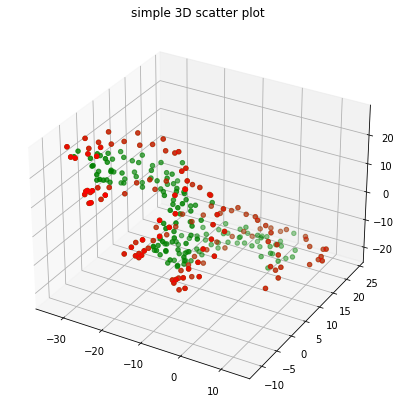

In [302]:
#plot molecule with its boundary points
for i in range(0,len(boundary_points)):
    np.array(bx.append(boundary_points[i][0]))
    np.array(by.append(boundary_points[i][1]))
    np.array(bz.append(boundary_points[i][2]))

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red")
plt.title("simple 3D scatter plot")
plt.show()

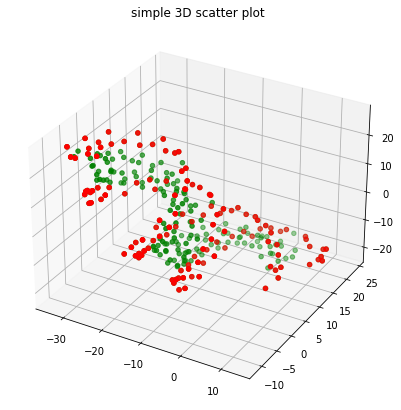

In [303]:
#plot molecule with its boundary points
for i in range(0,len(boundary_points)):
    np.array(bx.append(boundary_points[i][0]))
    np.array(by.append(boundary_points[i][1]))
    np.array(bz.append(boundary_points[i][2]))

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red")
plt.title("simple 3D scatter plot")
plt.show()

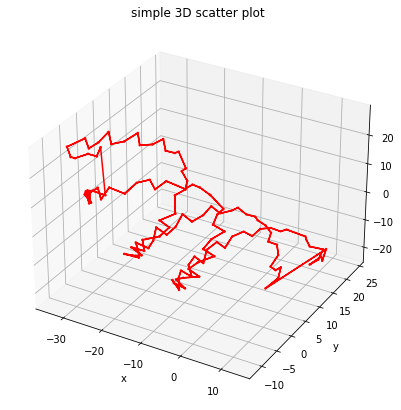

In [304]:
# Just the boundary plot 
fig2 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red",s=2)
plt.title("simple 3D scatter plot")
ax.plot(bx,by,bz,color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [305]:
#get spline data
spline = []
bndry_pts = boundary_points[:]
total_points_length = len(bndry_pts)
# for i in range(0,total_points_length):
i = 0
while i<len(bndry_pts):
    neighbours_array = []
    #thee is thy's first neighbour
    neighbours_array.append(bndry_pts[i])
#     print(i)
#     for j,val in enumerate(bndry_pts[i+1:]):
    j = i+1
    while(j<len(bndry_pts)):
        dis = distance(bndry_pts[i],bndry_pts[j])
#         print(dis)
        if(dis<15):
            neighbours_array.append(bndry_pts[j])
            del bndry_pts[j]
            total_points_length = total_points_length - 1
        j = j+1
#     if(len(centroid_array)>0):
    if(len(neighbours_array)>=3):
        print(neighbours_array)
        #calculate centroid for the neighbours
        centre = centroid(neighbours_array)
#         print(centre)
        spline.append(centroid(neighbours_array))
#         print(spline)
    i = i+1

[[-20.349, -11.404, 18.664], [-23.721, -11.276, 18.695], [-24.44, -10.947, 14.088], [-28.821, -7.445, 13.047], [-29.614, -5.259, 10.404], [-10.363, -7.22, 10.266], [-10.225, -2.579, 14.563], [-30.899, -9.141, 25.393], [-28.278, -7.088, 25.631], [-27.219, -4.556, 26.035]]
[[-25.753, -10.399, 17.197], [-27.407, -9.373, 14.282], [-29.865, -2.712, 9.615], [-29.262, 0.016, 7.489], [-33.071, 1.528, 20.378], [-33.84, -1.56, 24.076], [-28.817, -10.178, 26.705]]
[[-27.638, -7.926, 9.852], [-28.76, -3.109, 6.368], [-26.217, 4.951, 5.858], [-16.154, -8.944, 0.324], [-33.178, -1.288, 20.653]]
[[-27.193, 2.337, 3.998], [-24.152, 6.629, 6.241], [-21.177, 8.281, 5.421], [-15.214, 9.344, 5.545], [-21.083, 4.744, -7.742], [-21.301, -1.504, -7.285], [-21.51, 8.58, 15.647], [-24.916, 8.6, 16.583], [-30.298, 6.122, 17.761]]
[[-23.058, 6.933, 2.993], [-17.347, 9.559, 2.979], [-11.058, 9.678, 3.36], [-13.99, 14.073, -5.963], [-16.769, 11.116, -9.935], [-18.733, 8.211, -9.796], [-19.88, 2.293, -9.668], [-18.

[[-23.393, -7.691, 17.679], [-29.716, -4.668, 17.106], [-26.389, -3.263, 8.611], [-22.983, 5.904, 6.241], [-18.561, 8.622, 0.721], [-9.921, 5.845, 4.842], [-4.802, 3.789, -0.929], [-6.939, -4.924, -3.409], [-11.594, -5.226, -8.747], [-13.266, -1.004, -13.472], [-13.494, 6.799, -17.935], [-12.04, 14.636, -15.865], [-7.534, 18.849, -16.552], [0.239, 17.385, -14.734], [7.235, 16.734, -16.0], [8.798, 16.116, -18.222], [7.371, 11.125, -15.108]]


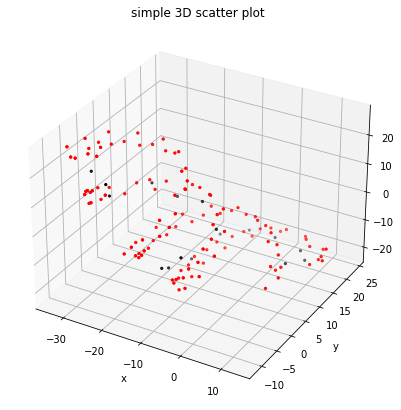

In [306]:
#Plot spine of molecule
#initialize arrays to plot the spine coordinates - centroidal axis
spline_x = []
spline_y = []
spline_z = []

print(spline)
for i in range(0,len(spline)):
    np.array(spline_x.append(spline[i][0]))
    np.array(spline_y.append(spline[i][1]))
    np.array(spline_z.append(spline[i][2]))
fig3 = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
# Creating plot
# ax.scatter3D(x,y,z, color = "green")
ax.scatter3D(bx,by,bz, color = "red",s=5)
ax.scatter3D(spline_x,spline_y,spline_z, color = "black",linestyle='-',s=5)
# ax.plot(spline_x,spline_y,spline_z, color='black')

plt.title("simple 3D scatter plot")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [307]:
# CHange k and m value such that the k implies the next ATOM position for spline pseudoatoms.
# and m implies the next residue number.
# For example, k and m for the below spline are 273 and 43 respectively.

#ATOM    271 CSC2 C   B  42     -25.972  -7.179  25.767  1.00  0.00              
#ATOM    272 CSC3 C   B  42     -27.219  -4.556  26.035  1.00  0.00
k = 273
m = 43


i = k
j = m
for line in spline:
#     print("ATOM    "+str(i)+" CENT P   G  "+str(j)+"       "+str(line[0])+"  "+str(line[1])+" "+str(line[2])+"  1.00  0.00")
    print("ATOM    "+str(i)+" CENT P   G  "+str(j)+"       "+str(line[0])+"  "+str(line[1])+" "+str(line[2])+"  1.00  0.00")
    i=i+1
    j=j+1

ATOM    273 CENT P   G  43       -23.393  -7.691 17.679  1.00  0.00
ATOM    274 CENT P   G  44       -29.716  -4.668 17.106  1.00  0.00
ATOM    275 CENT P   G  45       -26.389  -3.263 8.611  1.00  0.00
ATOM    276 CENT P   G  46       -22.983  5.904 6.241  1.00  0.00
ATOM    277 CENT P   G  47       -18.561  8.622 0.721  1.00  0.00
ATOM    278 CENT P   G  48       -9.921  5.845 4.842  1.00  0.00
ATOM    279 CENT P   G  49       -4.802  3.789 -0.929  1.00  0.00
ATOM    280 CENT P   G  50       -6.939  -4.924 -3.409  1.00  0.00
ATOM    281 CENT P   G  51       -11.594  -5.226 -8.747  1.00  0.00
ATOM    282 CENT P   G  52       -13.266  -1.004 -13.472  1.00  0.00
ATOM    283 CENT P   G  53       -13.494  6.799 -17.935  1.00  0.00
ATOM    284 CENT P   G  54       -12.04  14.636 -15.865  1.00  0.00
ATOM    285 CENT P   G  55       -7.534  18.849 -16.552  1.00  0.00
ATOM    286 CENT P   G  56       0.239  17.385 -14.734  1.00  0.00
ATOM    287 CENT P   G  57       7.235  16.734 -16.0  1.00 

#### Take only end points from spine and make a straight spine using midpoints

In [308]:
spline[-3]

[7.235, 16.734, -16.0]

In [309]:
#not necessary the end points in the spline list are the terminal points.
#add logic to detect end points == terminal points
p0 = spline[1]
pn = spline[-3]
p1 = []
p2 = [] 
p3 = []
p4 = []
p5 = []
p6 = []
p7 = []

In [310]:
p0

[-29.716, -4.668, 17.106]

In [311]:
pn

[7.235, 16.734, -16.0]

In [312]:
newspline = []
for i in range(0,3):
    p1.append(round (((p0[i]+pn[i])/2),2))
for i in range(0,3):
    p2.append(round(((p0[i]+p1[i])/2),2))
for i in range(0,3):
    p3.append(round(((p1[i]+pn[i])/2),2))
for i in range(0,3):
    p4.append(round(((p0[i]+p2[i])/2),2))
for i in range(0,3):
    p5.append(round(((p2[i]+p1[i])/2),2))
for i in range(0,3):
    p6.append(round(((p1[i]+p3[i])/2),2))
for i in range(0,3):
    p7.append(round(((p3[i]+pn[i])/2),2))
newspline.append(p0)
newspline.append(p1)
newspline.append(p2)
newspline.append(p3)
newspline.append(p4)
newspline.append(p5)
newspline.append(p6)
newspline.append(p7)
newspline.append(pn)

In [313]:
# spline

i = k
j = m
for line in newspline:
    print("ATOM    "+str(i)+" CENT P   G  "+str(j)+"     "+str(line[0])+"  "+str(line[1])+" "+str(line[2])+"  1.00  0.00")
    i=i+1
    j=j+1


ATOM    273 CENT P   G  43     -29.716  -4.668 17.106  1.00  0.00
ATOM    274 CENT P   G  44     -11.24  6.03 0.55  1.00  0.00
ATOM    275 CENT P   G  45     -20.48  0.68 8.83  1.00  0.00
ATOM    276 CENT P   G  46     -2.0  11.38 -7.72  1.00  0.00
ATOM    277 CENT P   G  47     -25.1  -1.99 12.97  1.00  0.00
ATOM    278 CENT P   G  48     -15.86  3.35 4.69  1.00  0.00
ATOM    279 CENT P   G  49     -6.62  8.71 -3.58  1.00  0.00
ATOM    280 CENT P   G  50     2.62  14.06 -11.86  1.00  0.00
ATOM    281 CENT P   G  51     7.235  16.734 -16.0  1.00  0.00


In [314]:
# Add these lines to molecule_0.itp
i=k
j=m
for line in newspline:
    print(str(i)+" "+"SPN  "+str(j)+" "+"P CENT "+str(i)+"  0.0")
    i=i+1
    j=j+1

273 SPN  43 P CENT 273  0.0
274 SPN  44 P CENT 274  0.0
275 SPN  45 P CENT 275  0.0
276 SPN  46 P CENT 276  0.0
277 SPN  47 P CENT 277  0.0
278 SPN  48 P CENT 278  0.0
279 SPN  49 P CENT 279  0.0
280 SPN  50 P CENT 280  0.0
281 SPN  51 P CENT 281  0.0


#### ------------------------------------older implementation------------------------------------------------


In [ ]:
#build a spine for ssRNA using only BB1, BB2, BB3
spline = []
beads = [[float(df['x'][0]),float(df['y'][0]),float(df['z'][0])]]
for i in range(1,len(df['Residue_num'])):
    if (df['Residue_num'][i] == df['Residue_num'][i-1]):
        if (df['Bead_name'][i] in ['BB1','BB2','BB3']):
            beads.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
    else:
        spline.append(centroid(beads))
        beads = []
        if(df['Bead_name'][i] in ['BB1','BB2','BB3']):
            beads.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
spline.append(centroid(beads))
print(spline)
# #build a spine for ssRNA
# spline = []
# beads = [[float(df['x'][0]),float(df['y'][0]),float(df['z'][0])]]
# for i in range(1,len(df['Residue_num'])):
#     if (df['Residue_num'][i] == df['Residue_num'][i-1]):
# #         if (df['Bead_name'][i] in ['BB1','BB2','BB3']):
#         beads.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
#     else:
#         spline.append(centroid(beads))
#         beads = []
# #         if(df['Bead_name'][i] in ['BB1','BB2','BB3']):
#         beads.append([float(df['x'][i]),float(df['y'][i]),float(df['z'][i])])
# spline.append(centroid(beads))
# print(spline)

In [ ]:
# #increase points in spine
# newspline = []
# for i in range(0,len(spline)-1):
#     mdpt = get_midpoint(spline[i],spline[i+1])
#     newspline.append(spline[i])
#     newspline.append(mdpt)
#     newspline.append(spline[i+1])

In [ ]:
# # spline
# i = 273
# j = 43
# for line in newspline:
#     print("ATOM    "+str(i)+" CENT P   G  "+str(j)+"     "+str(line[0])+"  "+str(line[1])+" "+str(line[2])+"  1.00  0.00")
#     i=i+1
#     j=j+1